# Toward Falsifying Causal Graphs Using a Permutation-Based Test

In [1]:
SEED = 1332
import os
import warnings

os.environ["PYTHONWARNINGS"] = "ignore"
warnings.simplefilter("ignore")
from dowhy.gcm.util.plotting import plot
from dowhy.gcm.falsify import falsify_graph
from dowhy.gcm.util.general import set_random_seed
from falsifydags.datasets import load_sachs_data, load_apm_data, load_auto_data
from falsifydags.utils.independence_tests import kernel_based
from sklearn.ensemble import GradientBoostingRegressor
from dowhy.gcm.independence_test.generalised_cov_measure import generalised_cov_based
from dowhy.gcm.ml import SklearnRegressionModel

set_random_seed(SEED)

In [2]:
# Define independence test based on the generalised covariance measure with gradient boosted decision trees as models
def create_gradient_boost_regressor(**kwargs) -> SklearnRegressionModel:
    return SklearnRegressionModel(GradientBoostingRegressor(**kwargs))


def gcm(X, Y, Z=None):
    return generalised_cov_based(
        X,
        Y,
        Z=Z,
        prediction_model_X=create_gradient_boost_regressor,
        prediction_model_Y=create_gradient_boost_regressor,
    )

### Protein network data (Sachs et al., 2005)

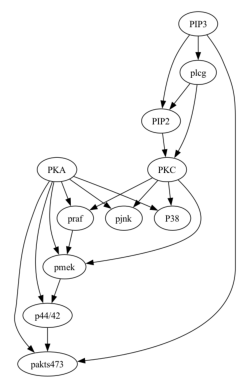

Test permutations of given graph: 100%|██████████| 1000/1000 [03:18<00:00,  5.05it/s]


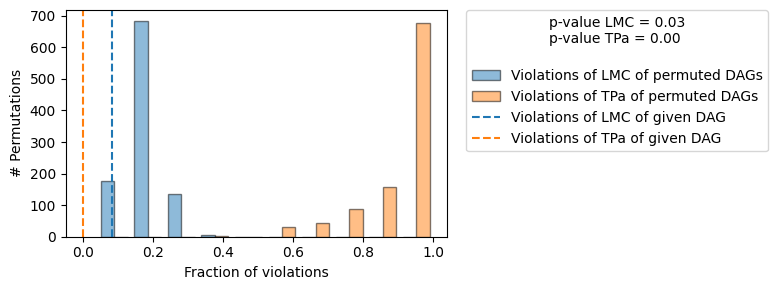

+-------------------------------------------------------------------------------------------------------+
|                                         Falsification Summary                                         |
+-------------------------------------------------------------------------------------------------------+
| The given DAG is informative because 0 / 1000 of the permutations lie in the Markov                   |
| equivalence class of the given DAG (p-value: 0.00).                                                   |
| The given DAG violates 4/49 LMCs and is better than 96.8% of the permuted DAGs (p-value: 0.03).       |
| Based on the provided significance level (0.05) and because the DAG is informative,                   |
| we do not reject the DAG.                                                                             |
+-------------------------------------------------------------------------------------------------------+


In [3]:
# Load the data
data_sachs, g_sachs = load_sachs_data()
# Plot the consensus graph
plot(g_sachs)
# Evaluate the graph
result_sachs = falsify_graph(
    g_sachs,
    data_sachs,
    n_permutations=1000,
    independence_test=gcm,
    conditional_independence_test=gcm,
    plot_histogram=True,
)

print(result_sachs)

### Application performance monitoring (APM) data

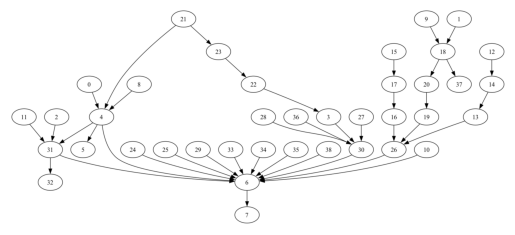

Test permutations of given graph: 100%|██████████| 1000/1000 [09:27<00:00,  1.76it/s]


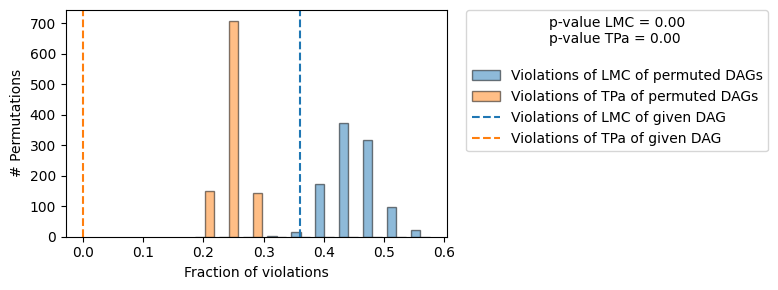

+-------------------------------------------------------------------------------------------------------+
|                                         Falsification Summary                                         |
+-------------------------------------------------------------------------------------------------------+
| The given DAG is informative because 0 / 1000 of the permutations lie in the Markov                   |
| equivalence class of the given DAG (p-value: 0.00).                                                   |
| The given DAG violates 174/484 LMCs and is better than 99.9% of the permuted DAGs (p-value: 0.00).    |
| Based on the provided significance level (0.05) and because the DAG is informative,                   |
| we do not reject the DAG.                                                                             |
+-------------------------------------------------------------------------------------------------------+


In [4]:
# Load the data
data_apm, g_apm = load_apm_data()
# Clean data from nodes with nans.
data_apm_clean = data_apm.dropna(axis=1)
# Plot the consensus graph
plot(g_apm)
# Evaluate the graph
result_apm = falsify_graph(
    g_apm,
    data_apm_clean,
    n_permutations=1000,
    independence_test=gcm,
    conditional_independence_test=gcm,
    plot_histogram=True,
)
print(result_apm)

### Auto MPG data (Quinlan et al. 1993)

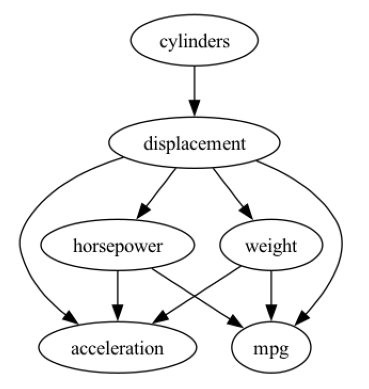

Test permutations of given graph: 100%|██████████| 720/720 [00:07<00:00, 96.76it/s] 


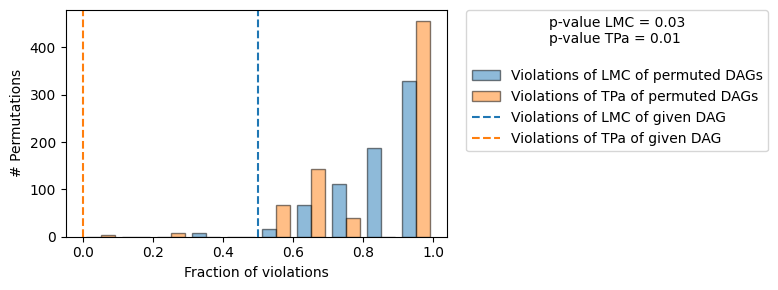

+-------------------------------------------------------------------------------------------------------+
|                                         Falsification Summary                                         |
+-------------------------------------------------------------------------------------------------------+
| The given DAG is informative because 4 / 720 of the permutations lie in the Markov                    |
| equivalence class of the given DAG (p-value: 0.01).                                                   |
| The given DAG violates 4/8 LMCs and is better than 96.7% of the permuted DAGs (p-value: 0.03).        |
| Based on the provided significance level (0.05) and because the DAG is informative,                   |
| we do not reject the DAG.                                                                             |
+-------------------------------------------------------------------------------------------------------+


In [5]:
# Load the data
data_auto, g_auto = load_auto_data()
# Plot the consensus graph
plot(g_auto)
# Evaluate the graph
result_auto = falsify_graph(
    g_auto,
    data_auto,
    independence_test=kernel_based,
    conditional_independence_test=kernel_based,
    n_permutations=1000,
    plot_histogram=True,
)
print(result_auto)